Md. Tanvir Jawad<br>ID: 21101221

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
Rmin = 0.02
Rmax = 0.055
L = 47
omega = 300

In [4]:
Ravg = (Rmax + Rmin) / 2

In [5]:
Cavg = 2 * np.pi * Ravg

In [6]:
revs = L / Cavg

In [7]:
theta = 2 * np.pi * revs
theta

1253.3333333333335

In [8]:
k_est = (Rmax - Rmin) / theta
k_est

2.7925531914893616e-05

In [9]:
init = State(theta=0, y=0, r=Rmin)

In [10]:
system = System(init=init, t_end=10)

In [11]:
def slope_func(t, state, system):
    theta, y, r = state

    dydt = r * omega
    drdt = k_est * omega

    return omega, dydt, drdt

In [12]:
slope_func(0, system.init, system)

(300, 6.0, 0.008377659574468085)

In [13]:
def event_func(t, state, system):
    theta, y, r = state
    return L - y

In [14]:
event_func(0, system.init, system)

47.0

In [15]:
results, details = run_solve_ivp(system, slope_func,
                                  events=event_func)
details.message

'A termination event occurred.'

In [16]:
results.tail()

,theta,y,r
4.010667,1203.200000,44.277760,0.05360
4.052444,1215.733333,44.951740,0.05395
4.094222,1228.266667,45.630107,0.05430
4.136000,1240.800000,46.312860,0.05465
4.177778,1253.333333,47.000000,0.05500


In [17]:
results.index[-1]

4.177777777777779

In [18]:
final_state = results.iloc[-1]
final_state.y

47.00000000000001

In [19]:
final_state.r

0.05500000000000001

In [20]:
radians = final_state.theta
rotations = radians / 2 / np.pi
rotations

199.47419534184218

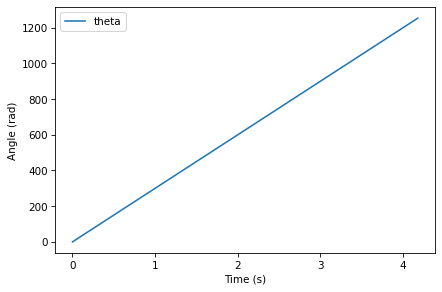

In [21]:
def plot_theta(results):
    results.theta.plot(color='C0', label='theta')
    decorate(xlabel='Time (s)',
             ylabel='Angle (rad)')

plot_theta(results)

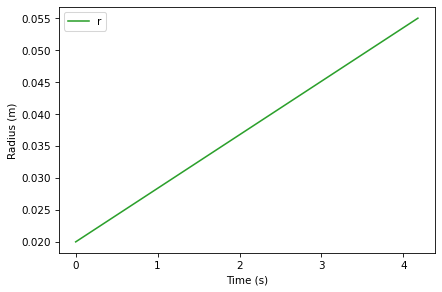

In [22]:
def plot_r(results):
    results.r.plot(color='C2', label='r')

    decorate(xlabel='Time (s)',
             ylabel='Radius (m)')

plot_r(results)

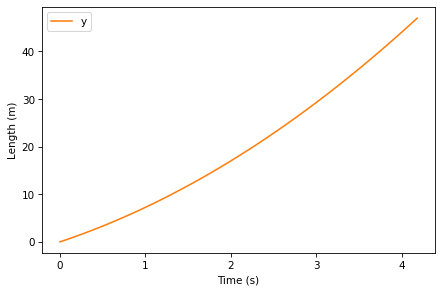

In [23]:
def plot_y(results):
    results.y.plot(color='C1', label='y')

    decorate(xlabel='Time (s)',
             ylabel='Length (m)')

plot_y(results)

In [24]:
k = (Rmax**2 - Rmin**2) / (2 * L)
k

2.7925531914893616e-05

In [25]:
dydt = gradient(results.y)

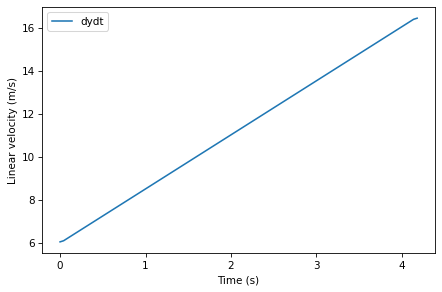

In [26]:
dydt.plot(label='dydt')
decorate(xlabel='Time (s)',
         ylabel='Linear velocity (m/s)')

In [27]:
max_linear_velocity = dydt.iloc[-1]
max_linear_velocity

16.447499999999934

In [28]:
dydt = gradient(results.y)


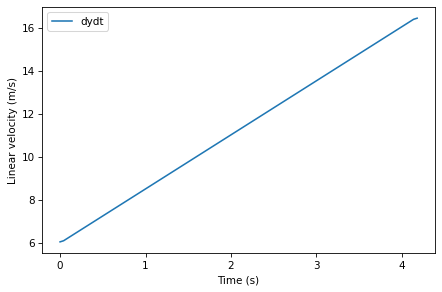

In [29]:
dydt.plot(label='dydt')
decorate(xlabel='Time (s)',
         ylabel='Linear velocity (m/s)')

In [30]:
max_linear_velocity = dydt.iloc[-1]
max_linear_velocity

16.447499999999934

In [31]:

def slope_func(t, state, system):
    theta, y, r = state

    dydt = max_linear_velocity
    omega = dydt / r
    drdt = k * omega

    return omega, dydt, drdt

In [32]:
slope_func(0, system.init, system)

(822.3749999999967, 16.447499999999934, 0.022965259308510545)

In [33]:
results, details = run_solve_ivp(system, slope_func,
                                 events=event_func)
details.message

'A termination event occurred.'

In [34]:
t_final = results.index[-1]
t_final

2.8575771393828964

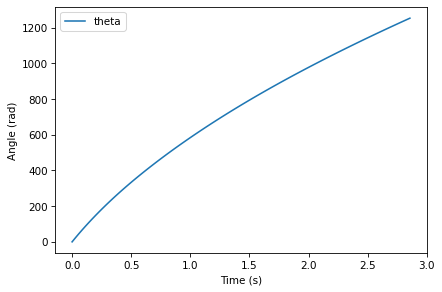

In [35]:
plot_theta(results)

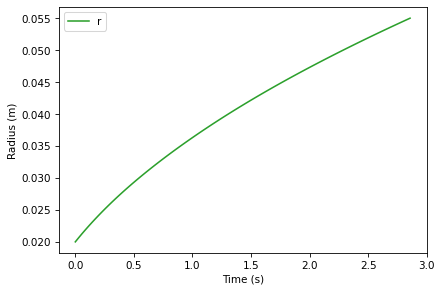

In [36]:
plot_r(results)

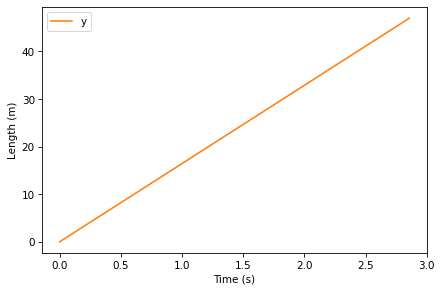

In [37]:
plot_y(results)

**MODIFICATON**

Problem Statement:
Imagine you have a spool of thread that is initially empty. The thread is being wound onto the spool at a constant angular velocity (ω). As the thread accumulates on the spool, the radius of the wound thread increases. You need to adjust the angular velocity over time such that the linear velocity (the speed at which the thread is wound) is kept constant.

In [41]:
r0 = 0.02
linear_velocity = 0.5
thread_thickness = 0.001
r_final = 0.1

def slope_func(t, state):
    r, omega = state
    omega = linear_velocity / r
    drdt = thread_thickness * omega
    return [drdt, omega]

def event_func(t, state):
    r = state[0]
    return r - r_final

event_func.terminal = True
event_func.direction = 1

init = [r0, linear_velocity / r0]

sol = solve_ivp(slope_func, t_span, init, events=event_func, dense_output=True)

t_final = sol.t[-1] if sol.status == 1 else None  # Check if event was triggered
t_final

9.614360805060716

This exercise demonstrated how to manage a system with changing physical parameters (like the radius of a winding spool) while maintaining a constant linear velocity. It involved adjusting the angular velocity in response to the changing radius to achieve this goal.

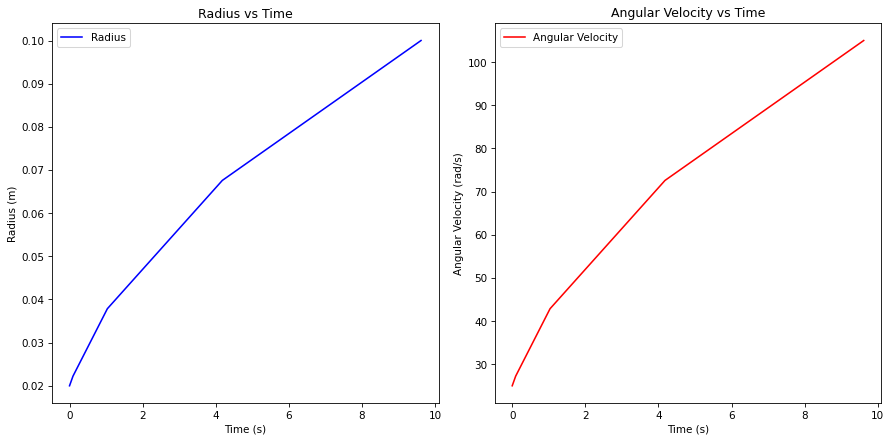

In [42]:
import matplotlib.pyplot as plt

time = sol.t
radius = sol.y[0]
angular_velocity = sol.y[1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time, radius, label='Radius', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Radius (m)')
plt.title('Radius vs Time')
plt.legend()

plt.plot(time, angular_velocity, label='Angular Velocity', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Angular Velocity vs Time')
plt.legend()

plt.tight_layout()
plt.show()


Here are the plots representing the changes in the radius and angular velocity of the spool over time:

Radius vs Time: This graph shows how the radius of the spool increases as time progresses. It illustrates the accumulation of thread on the spool.

Angular Velocity vs Time: This graph depicts the change in angular velocity required to maintain a constant linear velocity as the radius of the spool increases. As expected, the angular velocity decreases over time to keep the linear velocity constant.

These plots visually demonstrate the dynamics of the winding process, highlighting the inverse relationship between the radius of the spool and the required angular velocity to maintain a constant linear winding speed.